In [1]:
!pip install wordcloud
!pip install nltk
!pip install stopwords


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Iread_csvcessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

In [3]:
# Download stopwords for text cleaning
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv(r'D:\sentiment analysis\training.1600000.processed.noemoticon.csv',
                 encoding='latin-1', 
                 names=['target', 'id', 'date', 'flag', 'user', 'text'])

In [5]:
df['target'] = df['target'].replace(4, 1)

In [6]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

In [8]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [9]:
print(f"Total Tweets: {len(df)}")
print(df['target'].value_counts())

Total Tweets: 1600000
target
0    800000
1    800000
Name: count, dtype: int64


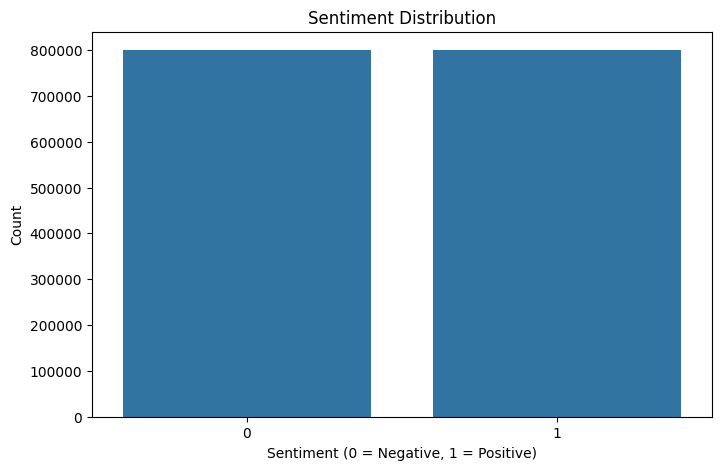

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

In [11]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

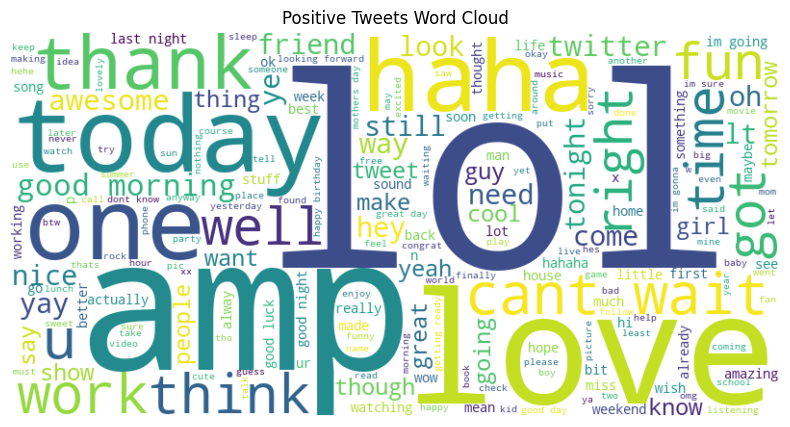

In [12]:
positive_tweets = df[df['target'] == 1]['cleaned_text']

generate_wordcloud(positive_tweets, 'Positive Tweets Word Cloud')


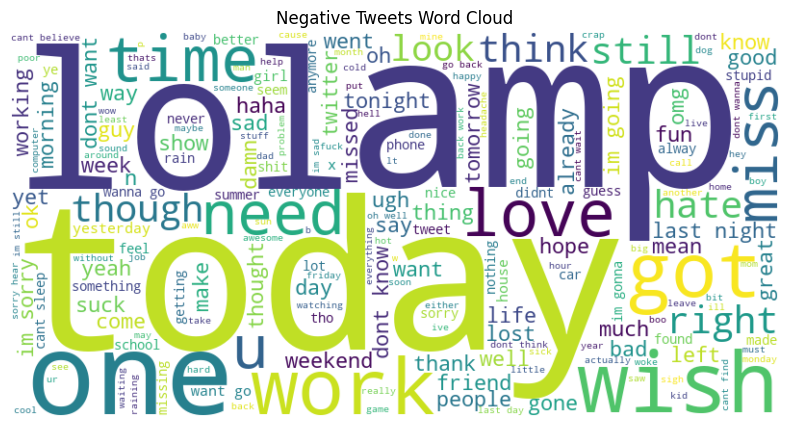

In [13]:
negative_tweets = df[df['target'] == 0]['cleaned_text']

generate_wordcloud(negative_tweets, 'Negative Tweets Word Cloud')

In [14]:
df['length'] = df['cleaned_text'].apply(len)

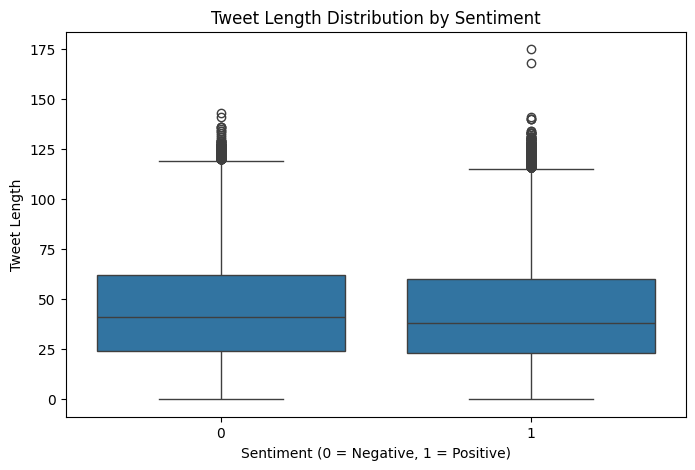

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='target', y='length')
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Tweet Length')
plt.show()

In [16]:
!pip install transformers
!pip install datasets
!pip install tf_keras


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
df['target'] = df['target'].replace(4, 1)
# Kiểm tra lại nhãn trong toàn bộ DataFrame
print("Unique labels in dataset:", set(df['target']))

label_counts = df['target'].value_counts()

print("The number of Positive and Negative Data:")
print(label_counts)

positive_count = label_counts[1]  # Dữ liệu tích cực (nhãn 1)
negative_count = label_counts[0]  # Dữ liệu tiêu cực (nhãn 0)

print(f"The number of positive data: {positive_count}")
print(f"The number of negative data: {negative_count}")

Unique labels in dataset: {0, 1}
The number of Positive and Negative Data:
target
0    800000
1    800000
Name: count, dtype: int64
The number of positive data: 800000
The number of negative data: 800000


In [19]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned_text'].tolist(),
    df['target'].tolist(),
    test_size=0.2,
    random_state=42
)

In [20]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=250)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=250)

c:\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
!pip install pytorch-optimizer
!pip install accelerate -U
!pip install transformers[Torch]

In [21]:
import torch
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback, AdamW, get_scheduler
from pytorch_optimizer import RAdam

print(torch.cuda.is_available())  
print(torch.cuda.device_count())  


training_args = TrainingArguments(
    output_dir='./results',                
    report_to="none",                     
    num_train_epochs=3,                   
    per_device_train_batch_size=16,        
    per_device_eval_batch_size=16,        
    warmup_steps=200,                     
    weight_decay=0.01,                    
    logging_dir='./logs',                 
    learning_rate=1e-5,                   
    adam_beta1=0.9,                       
    adam_beta2=0.999,                     
    adam_epsilon=1e-8,                    
    logging_steps=10,                     
    evaluation_strategy="steps",          
    save_steps=500,                       
    eval_steps=500,                       
    load_best_model_at_end=True,  
    metric_for_best_model="accuracy",           
    greater_is_better=True, 
    save_total_limit=2                    
)


callbacks = [EarlyStoppingCallback(early_stopping_patience=2)]


optimizer = RAdam([
    {'params': model.bert.encoder.layer[:6].parameters(), 'lr': 5e-5},
    {'params': model.bert.encoder.layer[6:9].parameters(), 'lr': 3e-5},
    {'params': model.bert.encoder.layer[9:].parameters(), 'lr': 2e-5},
    {'params': model.classifier.parameters(), 'lr': 2e-5}
], betas=(0.9, 0.999),weight_decay=0.001)


num_training_steps = len(train_dataset) // training_args.per_device_train_batch_size * training_args.num_train_epochs

lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=training_args.warmup_steps,
    num_training_steps=num_training_steps
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,          
    eval_dataset=test_dataset,  
    compute_metrics=compute_metrics,
    callbacks=callbacks,                  
    optimizers=(optimizer, lr_scheduler)  
)

False
0


<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
C:\Users\hp\AppData\Local\Temp\ipykernel_12112\3435660515.py:44: SyntaxWarning: invalid escape sequence '\s'
  num_training_steps = len('D:\sentiment analysis\training.1600000.processed.noemoticon.csvrain_dataset') // training_args.per_device_train_batch_size * training_args.num_train_epochs
c:\Python312\Lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\hp\AppData\Local\Temp\ipykernel_12112\3435660515.py:44: SyntaxWarning: invalid escape sequence '\s'
  num_training_steps = len('D:\sentiment analysis\training.1600000.processed.noemoticon.csvrain_dataset') // training_args.per_device_train_batch_size * training_args.num_train_epochs


NameError: name 'model' is not defined

In [ ]:

trainer.train()

predictions, labels, _ = trainer.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)


comparison_df = pd.DataFrame({
    'Original_Text': test_texts,           
    'Original_Label': test_labels,         
    'Predicted_Label': predictions         
})


print(comparison_df.head(20))


comparison_df.to_csv('bert_comparison_results.csv', index=False)


print(classification_report(test_labels, predictions))

trainer.save_model("./best_model") 

NameError: name 'trainer' is not defined

In [ ]:
import matplotlib.pyplot as plt

train_loss = []
eval_loss = []
steps = [] 


for log in trainer.state.log_history:
    if 'loss' in log:
        train_loss.append(log['loss'])
        steps.append(log['step'])  
    if 'eval_loss' in log:
        eval_loss.append(log['eval_loss'])

plt.figure(figsize=(10, 5))
plt.plot(steps, train_loss, label='Training Loss')
plt.plot(steps[:len(eval_loss)], eval_loss, label='Evaluation Loss')  
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training & Evaluation Loss over Steps')
plt.legend()
plt.show()

NameError: name 'trainer' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(test_labels, predictions, average='weighted')
recall = recall_score(test_labels, predictions, average='weighted')
f1 = f1_score(test_labels, predictions, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


roc_auc = roc_auc_score(test_labels, predictions)
print(f"AUC-ROC: {roc_auc:.4f}")

fpr, tpr, _ = roc_curve(test_labels, predictions)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()